<a href="https://colab.research.google.com/github/Floressek/LanguageProcessingLab/blob/main/Lab1/Szymon_Florek_NLP_EN_Lab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Autorzy: Szymon Florek


> Add blockquote



# Programming assignment 1

In this exercise you are going to learn one of leading NLP Libraries:

https://www.nltk.org/




# 1 Sourcing
Download 5-10 books with requests library  (https://docs.python-requests.org/en/latest/).

You can find English books in plain text format on: https://www.gutenberg.org/browse/scores/top). Polish books are available on: https://wolnelektury.pl/


Create **corpora**  as list where each element of list contains text from single book




In [ ]:
import warnings
warnings.filterwarnings('ignore')
!pip install wolne_lektury
!pip install nltk scikit-learn

In [ ]:
import requests
import json
import time
from typing import List

BOOKS_TO_FETCH = [
    "pan-tadeusz",
    "janko-muzykant",
    "ballady-i-romanse",
    "w-pustyni-i-w-puszczy",
    "ballady-i-romanse-rekawiczka",
    "quo-vadis",
    "bartek-zwyciezca",
    "ballady-i-romanse-lilje",
]
API_BASE = "https://wolnelektury.pl/api"

def get_book_text(book_slug: str) -> str | None:
  print(f"Pobieranie: {book_slug}...", end=" ", flush=True)

  try:
    meta_url = f"{API_BASE}/books/{book_slug}/"
    meta_response = requests.get(meta_url, timeout=10)
    meta_response.raise_for_status()
    metadata = meta_response.json()

    text_url = metadata.get('txt')
    if not text_url:
      print(f"error: text URL not found")
      return None

    text_response = requests.get(text_url, timeout=10)
    text_response.raise_for_status()
    text = text_response.text

    print(f"done ({len(text)} znakow)")
    return {
        "title": metadata.get('title'),
        "author": metadata.get('author'),
        "text": text,
        "chars": len(text)
    }

  except Exception as e:
    print(f"error: {e}")
    return None

def fetch_corpus(book_slugs) -> List:
  corpus = []
  for slug in book_slugs:
    book_data = get_book_text(slug)
    if book_data:
      corpus.append(book_data)
    time.sleep(1)
  return corpus

print(f"pobrieranie corpusu")
corpus = fetch_corpus(BOOKS_TO_FETCH)

print(f"Stats: z {len(corpus)} ksiazek")
for book in corpus:
  print(f" - {book['title']} ({book['chars']} znakow)")

pobrieranie corpusu
Pobieranie: pan-tadeusz... done (458185 znakow)
Pobieranie: janko-muzykant... done (15491 znakow)
Pobieranie: ballady-i-romanse... done (6495 znakow)
Pobieranie: w-pustyni-i-w-puszczy... done (644970 znakow)
Pobieranie: ballady-i-romanse-rekawiczka... done (3408 znakow)
Pobieranie: quo-vadis... done (1097217 znakow)
Pobieranie: bartek-zwyciezca... done (100791 znakow)
Pobieranie: ballady-i-romanse-lilje... done (10959 znakow)
Stats: z 8 ksiazek
 - Pan Tadeusz, czyli ostatni zajazd na Litwie (458185 znakow)
 - Janko Muzykant (15491 znakow)
 - Ballady i romanse (6495 znakow)
 - W pustyni i w puszczy (644970 znakow)
 - Rękawiczka (3408 znakow)
 - Quo vadis (1097217 znakow)
 - Bartek zwycięzca (100791 znakow)
 - Lilije (10959 znakow)


# 2  Preprocessing

Preprocess documents using nltk library:

* remove stopwords
* remove tokens containing non-alphanumeric characters
* apply lowercase

https://www.nltk.org/book_1ed/ch03.html

+++++++++++++++++++++++++++++++++++++++++++++++

stop words pobralem z:
https://countwordsfree.com/stopwords/polish

pobrany plik powinien widniec w sekcji plikow
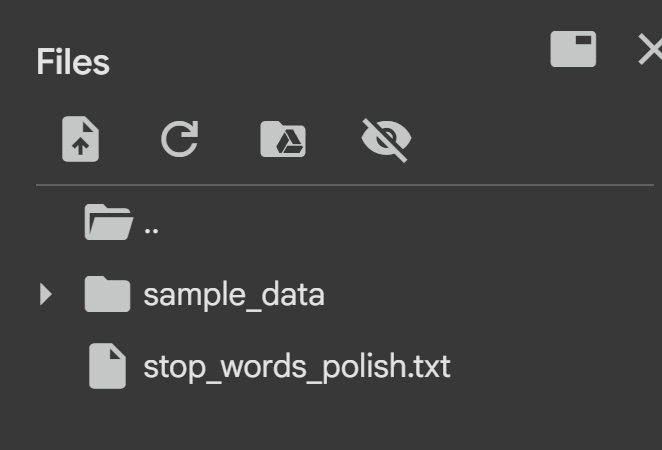




In [ ]:
from nltk.corpus import stopwords
print(stopwords.fileids())
# brak polskiego wiec pobieram stop words z neta jak opisane wczesniej

['albanian', 'arabic', 'azerbaijani', 'basque', 'belarusian', 'bengali', 'catalan', 'chinese', 'danish', 'dutch', 'english', 'finnish', 'french', 'german', 'greek', 'hebrew', 'hinglish', 'hungarian', 'indonesian', 'italian', 'kazakh', 'nepali', 'norwegian', 'portuguese', 'romanian', 'russian', 'slovene', 'spanish', 'swedish', 'tajik', 'tamil', 'turkish']


In [ ]:
import nltk
import re
from nltk.tokenize import word_tokenize
nltk.download('punkt_tab')
nltk.download('punkt')

with open('stop_words_polish.txt', 'r', encoding='utf-8') as f:
    POLISH_STOPWORDS = set(f.read().strip().split('\n'))
# print(POLISH_STOPWORDS)

# smieciowe slowa w txt plikach psujace tekst lektur
TRUBLESOME_WORDS_SCRAPED = {'wolnelekturypl', '9788328872509', 'wolnych', 'lektur'}


def tokenize_text(text: str) -> list:
  # nltk tokenizer uzyty
  return word_tokenize(text, language='polish')

def clean_token(token: str) -> str:
  token = token.lower()
  # z netu wziety Regex dla usuwania znakow specjalnych etc
  token = re.sub(r"[^a-ząćęłńóśźża-z0-9]", "", token)
  return token

def preprocess_documents(text: str) -> list:
  stop_word_pl = POLISH_STOPWORDS
  troublesome_words = TRUBLESOME_WORDS_SCRAPED
  tokens = tokenize_text(text)
  cleaned_tokens = []
  for token in tokens:
    clean = clean_token(token)

    if len(clean) < 2:
      continue

    if clean in stop_word_pl or clean in troublesome_words:
      continue

    cleaned_tokens.append(clean)

  return cleaned_tokens

print("czyszczenie korpusu")
cleaned_corpus = []
for book in corpus:
  print(f"czyszczenie {book['title']}")

  tokens = preprocess_documents(book['text'])

  cleaned_book = {
      "title": book['title'],
      "author": book['author'],
      "tokens": tokens,
      "cleaned_tokens_count": len(tokens),
      "cleaned_tokens": tokens
  }
  cleaned_corpus.append(cleaned_book)
  print(f"{len(tokens)} tokenow, a unikalnych mamy: {len(set(tokens))}")

czyszczenie korpusu
czyszczenie Pan Tadeusz, czyli ostatni zajazd na Litwie


[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


44575 tokenow, a unikalnych mamy: 18598
czyszczenie Janko Muzykant
1434 tokenow, a unikalnych mamy: 1065
czyszczenie Ballady i romanse
626 tokenow, a unikalnych mamy: 553
czyszczenie W pustyni i w puszczy
58623 tokenow, a unikalnych mamy: 17822
czyszczenie Rękawiczka
314 tokenow, a unikalnych mamy: 260
czyszczenie Quo vadis
98436 tokenow, a unikalnych mamy: 25739
czyszczenie Bartek zwycięzca
9279 tokenow, a unikalnych mamy: 5069
czyszczenie Lilije
1032 tokenow, a unikalnych mamy: 741


# 3 Word Frequency and Zipf Law

For each document create frequency plots. You can use any of this:
* CountVectorizer from sklearn library
* plain counter


Check whether Zipf's law holds for  selected documents.

Example output:

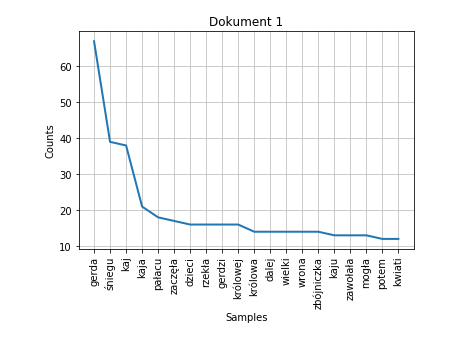

czestosc tokenow
Pan Tadeusz, czyli ostatni zajazd na Litwie: top 5: [('rzekł', 155), ('hrabia', 129), ('sędzia', 127), ('tadeusz', 107), ('ze', 99)]
Janko Muzykant: top 5: [('janek', 10), ('skrzypki', 8), ('coraz', 8), ('matka', 7), ('raz', 7)]
Ballady i romanse: top 5: [('lubię', 6), ('raz', 3), ('wilk', 3), ('cha', 3), ('próżno', 3)]
W pustyni i w puszczy: top 5: [('staś', 631), ('nel', 553), ('kali', 256), ('ze', 205), ('dzieci', 173)]
Rękawiczka: top 5: [('znowu', 5), ('lektury', 5), ('król', 4), ('stronie', 4), ('wolne', 4)]
Quo vadis: top 5: [('winicjusz', 612), ('zaś', 549), ('rzekł', 538), ('petroniusz', 424), ('ze', 390)]
Bartek zwycięzca: top 5: [('bartek', 160), ('magda', 56), ('ze', 36), ('bartka', 32), ('nagle', 31)]
Lilije: top 5: [('mąż', 19), ('bieży', 10), ('stuk', 8), ('czekają', 7), ('ha', 6)]


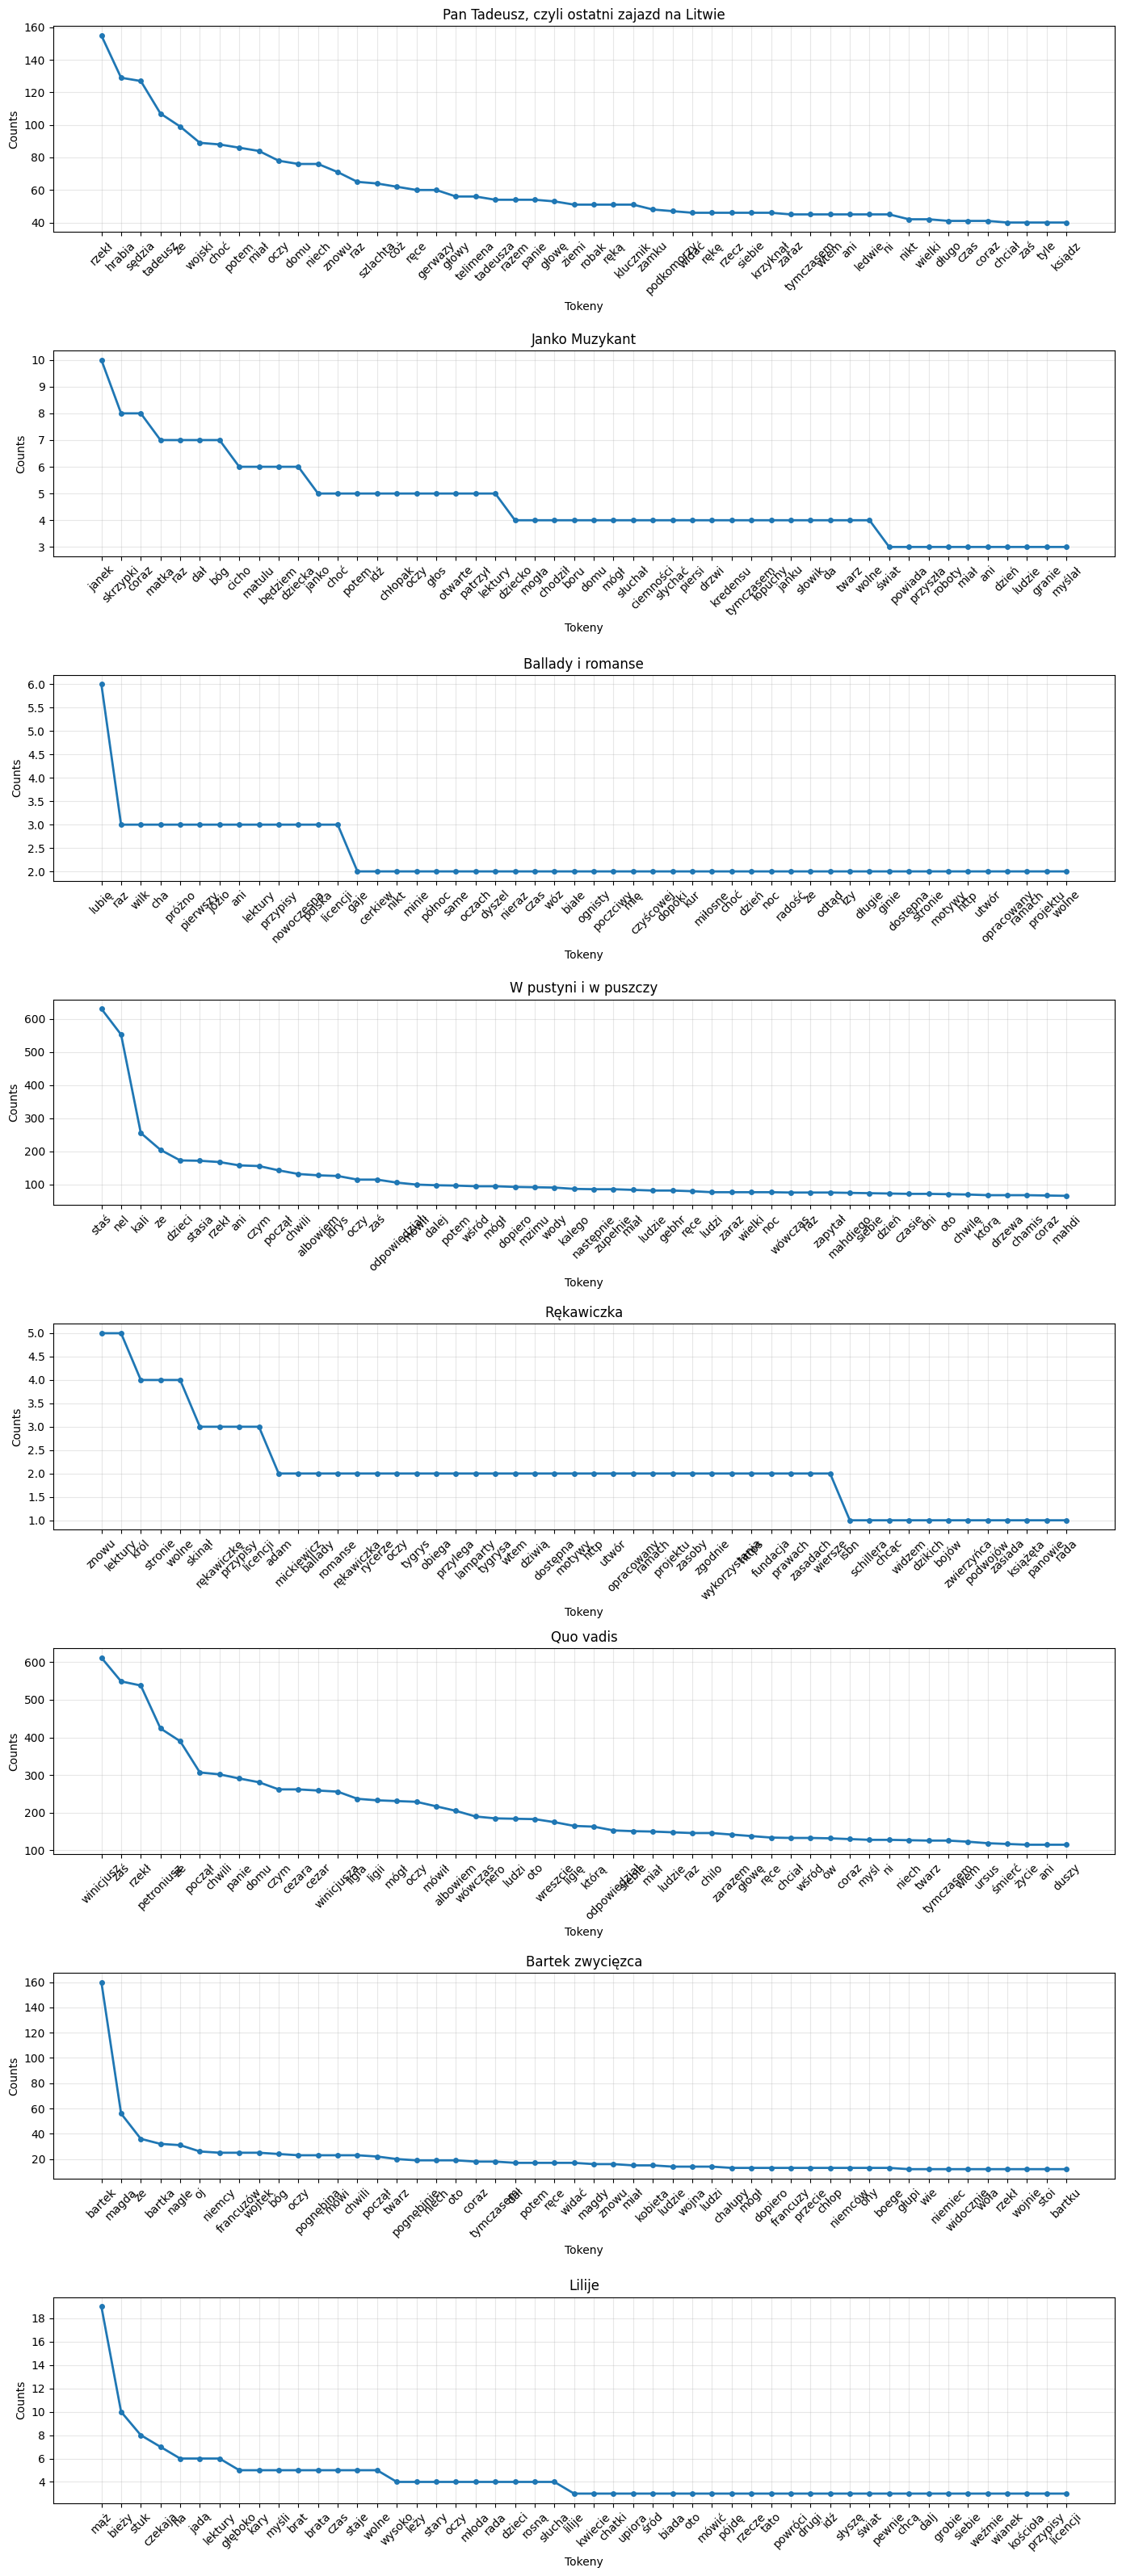

In [ ]:
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np

fig, axes = plt.subplots(len(cleaned_corpus), 1, figsize=(14, 4 * len(cleaned_corpus)))
if len(cleaned_corpus) == 1:
    axes = [axes]

print("czestosc tokenow")

for idx, book in enumerate(cleaned_corpus):
    token_counts = Counter(book['tokens'])
    sorted_counts = sorted(token_counts.items(), key=lambda x: x[1], reverse=True)[:50]

    tokens = [t[0] for t in sorted_counts]
    counts = [t[1] for t in sorted_counts]

    axes[idx].plot(tokens, counts, 'o-', linewidth=2, markersize=4)
    axes[idx].set_title(f'{book["title"]}')
    axes[idx].set_xlabel('Tokeny')
    axes[idx].set_ylabel('Counts')
    axes[idx].grid(True, alpha=0.3)
    axes[idx].tick_params(axis='x', rotation=45)

    print(f"{book['title']}: top 5: {sorted_counts[:5]}")

plt.tight_layout()
plt.show()

#4 TF-IDF

Create TF-IDF matrix for corpus using TfidfVectorizer

https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html




In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np

texts = [' '.join(book['tokens']) for book in cleaned_corpus]

tfidf = TfidfVectorizer()
tfidf_matrix = tfidf.fit_transform(texts)

feature_names = tfidf.get_feature_names_out()

for idx, book in enumerate(cleaned_corpus):
  print(f"\n{book['title']}")
  tfidf_scores = tfidf_matrix[idx].toarray()[0]
  # top 20
  sorted_top_indicies = np.argsort(tfidf_scores)[::-1][:20]

  for rank, i in enumerate(sorted_top_indicies, 1):
       print(f"  {rank}. {feature_names[i]}: {tfidf_scores[i]:.4f}")

print("\nTF-IDF matrix gotowa")




Pan Tadeusz, czyli ostatni zajazd na Litwie
  1. hrabia: 0.2543
  2. tadeusz: 0.2109
  3. sędzia: 0.2098
  4. wojski: 0.1755
  5. rzekł: 0.1527
  6. szlachta: 0.1262
  7. gerwazy: 0.1183
  8. telimena: 0.1104
  9. tadeusza: 0.1065
  10. klucznik: 0.1005
  11. podkomorzy: 0.0927
  12. robak: 0.0843
  13. miał: 0.0828
  14. zamku: 0.0793
  15. ze: 0.0779
  16. cóż: 0.0775
  17. choć: 0.0774
  18. potem: 0.0757
  19. ręce: 0.0750
  20. domu: 0.0749

Janko Muzykant
  1. janek: 0.2665
  2. skrzypki: 0.2132
  3. matulu: 0.1599
  4. janko: 0.1333
  5. coraz: 0.1197
  6. będziem: 0.1157
  7. janku: 0.1066
  8. łopuchy: 0.1066
  9. matka: 0.1047
  10. dał: 0.1047
  11. bóg: 0.0932
  12. raz: 0.0932
  13. dziecka: 0.0898
  14. cicho: 0.0898
  15. kredensu: 0.0894
  16. słowik: 0.0894
  17. chłopak: 0.0845
  18. będziewa: 0.0800
  19. weselili: 0.0800
  20. skrzypce: 0.0800

Ballady i romanse
  1. lubię: 0.1977
  2. cha: 0.1306
  3. józio: 0.1306
  4. czyścowej: 0.1039
  5. miłosne: 0.1039
  6. 

#5 Document similarity

Using cosine similarity find similarity between documents for each pair of documents in the corpus. You can use: #https://scikit-learn.org/stable/modules/generated/sklearn.metrics.pairwise.cosine_similarity.html

Print similarity  matrix for the corpus.

Which two documents are the most similar ones? Which are different ? Write your answer in text cell below.

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
import pandas as pd

similarity_matrix = cosine_similarity(tfidf_matrix)

titles = [book['title'] for book in cleaned_corpus]
sim_df = pd.DataFrame(similarity_matrix, columns=titles, index=titles)

print("similarity matrix")
print(sim_df.round(5))

similarities = []
for i in range(len(cleaned_corpus)):
  for j in range(i+1, len(cleaned_corpus)):
    similarities.append(
        {
          'doc1': titles[i],
          'doc2': titles[j],
          'similarity': similarity_matrix[i][j]
        }
        )

similarities_s_most_sim = sorted(similarities, key=lambda x: x['similarity'], reverse=True)
similarities_s_least_sim = sorted(similarities, key=lambda x: x['similarity'], reverse=False)

print("\nmost similar documents")
print(similarities_s_most_sim)

print("\nleast similar documents")
print(similarities_s_least_sim)


similarity matrix
                                             Pan Tadeusz, czyli ostatni zajazd na Litwie  \
Pan Tadeusz, czyli ostatni zajazd na Litwie                                      1.00000   
Janko Muzykant                                                                   0.15953   
Ballady i romanse                                                                0.11484   
W pustyni i w puszczy                                                            0.19896   
Rękawiczka                                                                       0.07129   
Quo vadis                                                                        0.29316   
Bartek zwycięzca                                                                 0.19804   
Lilije                                                                           0.13338   

                                             Janko Muzykant  \
Pan Tadeusz, czyli ostatni zajazd na Litwie         0.15953   
Janko Muzykant             

Your comment on this:
> Najbardziej podobne: **Pan Tadeusz** i **Quo vadis** z score: `0.29` podobieństwa.

> Najmniej zas **W pustyni i w puszczy** i **Rękawiczka z score**: *0.03*

# 6  PCA
Using PCA (Principal Component Analysis)  represent each document as a point in 2-dimensional space.

https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html


Visulize documents on  dot-chart. Remember to add observation labels (doc titles) to points on chart.

How does output correlate to similarity matrix  ?

Example output:

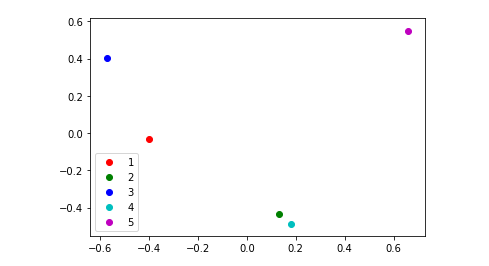

wariancja: [0.19492524 0.14915956]
wartosc: 34.41%
PC1 (19.5%)
PC2 (14.9%)


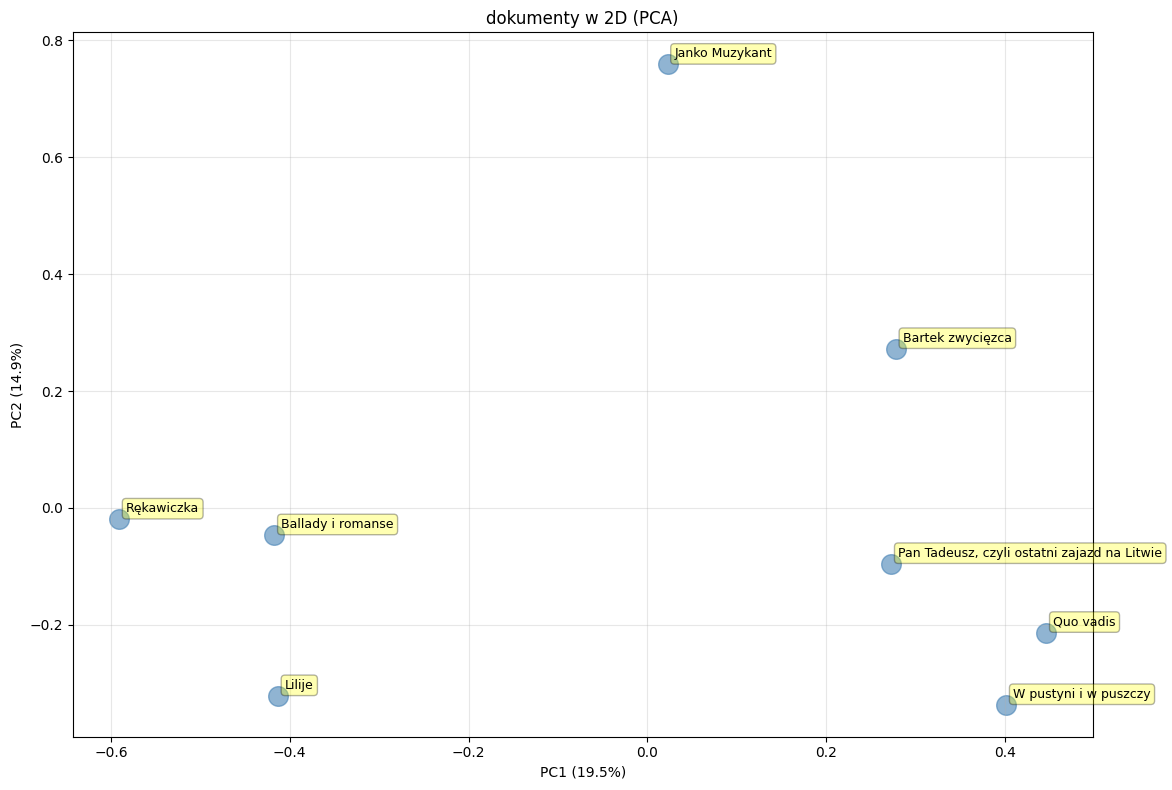

TF-IDF Matrix shape: (8, 47531)
Dokumenty: 8
WYMIARY (tokeny): 47531

Unikalnych tokenów - wymiar drugi: 47531


In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
documents_2d = pca.fit_transform(tfidf_matrix)

print(f"wariancja: {pca.explained_variance_ratio_}")
print(f"wartosc: {pca.explained_variance_ratio_.sum():.2%}")
print(f'PC1 ({pca.explained_variance_ratio_[0]:.1%})')
print(f'PC2 ({pca.explained_variance_ratio_[1]:.1%})')

# wykres
plt.figure(figsize=(12, 8))

# ppunkty
plt.scatter(documents_2d[:, 0], documents_2d[:, 1], s=200, alpha=0.6, c='steelblue')

# etykiety
titles = [book['title'] for book in cleaned_corpus]
for i, title in enumerate(titles):
    plt.annotate(title,
                (documents_2d[i, 0], documents_2d[i, 1]),
                xytext=(5, 5),
                textcoords='offset points',
                fontsize=9,
                bbox=dict(boxstyle='round,pad=0.3', facecolor='yellow', alpha=0.3))

plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.1%})')
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.1%})')
plt.title('dokumenty w 2D (PCA)')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print(f"TF-IDF Matrix shape: {tfidf_matrix.shape}")
print(f"Dokumenty: {tfidf_matrix.shape[0]}")
print(f"WYMIARY (tokeny): {tfidf_matrix.shape[1]}")

feature_names = tfidf.get_feature_names_out()
print(f"\nUnikalnych tokenów - wymiar drugi: {len(feature_names)}")

**PCA dobrze odzwierciedla similarity matrix:**
- Dokumenty **blisko na wykresie** mają **wysoką similarity** (Pan Tadeusz ↔ Quo vadis: 0.293)
- Dokumenty **daleko na wykresie** mają **niską similarity** (Rękawiczka: ~0.07)

Zas z similairty searchu bylo:
- Najbardziej podobne: **Pan Tadeusz** i **Quo vadis** z score: 0.29 podobieństwa.
- Najmniej zas** W pustyni i w puszczy** i **Rękawiczka** z score: ~0.03

**Wniosek:** 34% wariancji z 2 komponentów wystarczy do reprezentacji struktury podobieństwa pomiędzy dokumentami.